In [1]:
import numpy as np
from sklearn.datasets import load_iris # dataset
from sklearn.model_selection import train_test_split # split the dataset for training and testing (unequal parts)
from sklearn.model_selection import StratifiedShuffleSplit # split the dataset into equal part for training and testing
from sklearn.preprocessing import StandardScaler # scale the training data
from sklearn.neighbors import KNeighborsClassifier # train the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_iris(as_frame=True, return_X_y=False)
df = data.frame

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
X, y = load_iris(return_X_y=True, as_frame=False)

In [7]:
# split the dataset
sp = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for trainIdx, testIdx in sp.split(X, y):
    X_train, X_test = X[trainIdx], X[testIdx]
    y_train, y_test = y[trainIdx], y[testIdx]

In [8]:
# scale the dataset
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [9]:
# train model using KNN algoritm
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
# predict the test data
y_pred = knn.predict(X_test_scaled)

In [11]:
# evaluate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy is: {acc}")

Accuracy is: 0.9666666666666667


In [11]:
# classification report
print("Classification Report: ")
cr = classification_report(y_test, y_pred)
print(cr)

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [12]:
# confusion matrix
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion Matrix: 
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


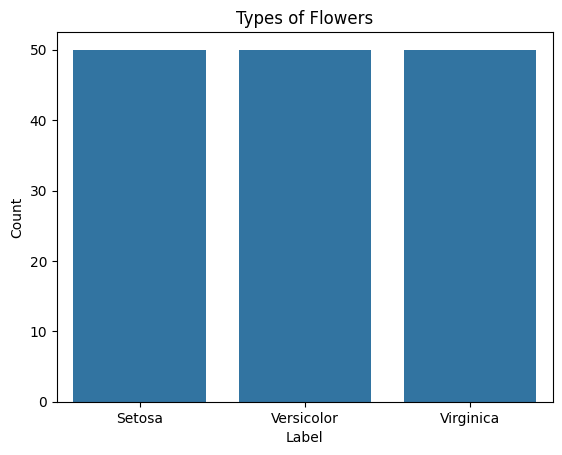

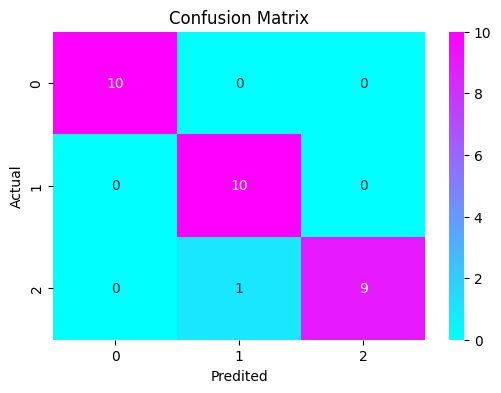

In [13]:
# visualization

sns.countplot(x=y)
plt.title("Types of Flowers")
plt.xticks([0, 1, 2], ["Setosa", "Versicolor", "Virginica"])
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='cool')
plt.title('Confusion Matrix')
plt.xlabel('Predited')
plt.ylabel('Actual')
plt.show()